In [1]:
from cspe.utilities import ImageDatabase
from sklearn.cluster import HDBSCAN

In [2]:
image_db = ImageDatabase.load_from_disk("imagedb.pth")

In [3]:
len(image_db.items)

7776

In [4]:
image_db[4]

{'features': {'low_level': array([60.24316732, 68.1009375 , 95.22690755]),
  'semantic': array([0.05814332, 0.06035418, 0.05306424, 0.069287  , 0.02928871,
         0.0058829 , 0.0043195 , 0.1891877 , 0.03041103, 0.0768894 ,
         0.07580904, 0.00142263, 0.00378086, 0.00265515, 0.00637302,
         0.00098509, 0.00281199, 0.00736078, 0.06440398, 0.04473207,
         0.01560334, 0.00035648, 0.0039347 , 0.00024696, 0.02077736,
         0.01895007, 0.04069003, 0.01985049, 0.00782654, 0.05032605,
         0.00072079, 0.00445285, 0.02910177], dtype=float32)},
 'information': array([6.02431673e+01, 6.81009375e+01, 9.52269076e+01, 5.81433177e-02,
        6.03541844e-02, 5.30642420e-02, 6.92870021e-02, 2.92887092e-02,
        5.88290021e-03, 4.31949971e-03, 1.89187706e-01, 3.04110311e-02,
        7.68894032e-02, 7.58090392e-02, 1.42262771e-03, 3.78085906e-03,
        2.65514827e-03, 6.37301523e-03, 9.85088991e-04, 2.81199068e-03,
        7.36077502e-03, 6.44039810e-02, 4.47320677e-02, 1.560

In [5]:
import pandas as pd
df = pd.DataFrame(image_db.items)

In [6]:
image_db.items[0]['information'].shape

(36,)

In [7]:
df.head()


,features,information,timestamp
0,"{'low_level': [60.229573567708336, 68.08343424...","[60.229573567708336, 68.08343424479166, 95.206...",1.743361e+09
1,"{'low_level': [60.23353841145833, 68.089811197...","[60.23353841145833, 68.08981119791666, 95.2118...",1.743361e+09
2,"{'low_level': [60.238756510416664, 68.09425130...","[60.238756510416664, 68.09425130208334, 95.218...",1.743361e+09
3,"{'low_level': [60.24311197916666, 68.099208984...","[60.24311197916666, 68.099208984375, 95.225257...",1.743361e+09
4,"{'low_level': [60.243167317708334, 68.1009375,...","[60.243167317708334, 68.1009375, 95.2269075520...",1.743361e+09


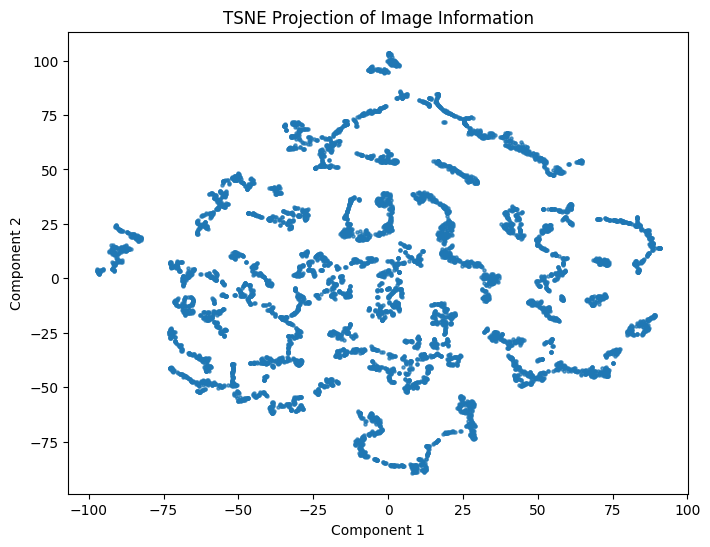

In [8]:
from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt

# Convert the 'information' column (which contains lists) into a numpy array
X = np.array(df['information'].tolist())

# Apply TSNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plot the TSNE output
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=5, alpha=0.7)
plt.title("TSNE Projection of Image Information")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

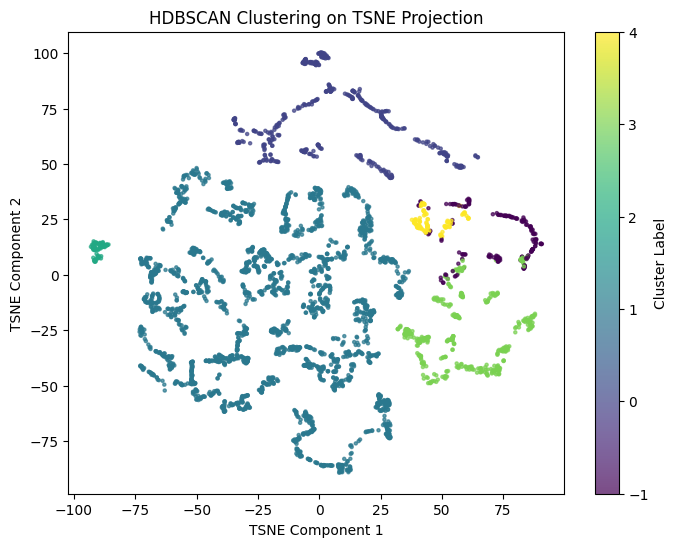

In [9]:
# Perform HDBSCAN clustering on the original high-dimensional information data
N=4000
clusterer = HDBSCAN(min_cluster_size=40)
cluster_labels = clusterer.fit_predict(X[:N])

# Plot the TSNE projection with clusters labeled by HDBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:N, 0], X_embedded[:N, 1], c=cluster_labels, cmap='viridis', s=5, alpha=0.7)
plt.title("HDBSCAN Clustering on TSNE Projection")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar(label="Cluster Label")
plt.show()